## Installing required libraries

In [26]:
#!pip install scikit-learn
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import pandas as pd
import numpy as np

## Reading the merged dataframe

In [2]:
df=pd.read_csv("df_admissions.csv")
df

,Unnamed: 0,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,...,race,edregtime,edouttime,hospital_expire_flag,subject_id_hadm_id,long_title,icd_code,first_careunit,last_careunit,los
0,0,10000100,58594204243,2019-06-26 13:20:00,2019-07-05 12:47:00,NaN,NaN,NaN,PHYSIC OFC/CLINIC,HOME SELF CARE,...,African American or Black,NaN,NaN,0,10000100_58594204243,Abscess of liver,K75.0,NaN,NaN,NaN
1,1,10000562,60707883031,2016-06-02 09:24:00,2016-06-04 15:11:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME SELF CARE,...,African American or Black,NaN,NaN,0,10000562_60707883031,Long term (current) use of insulin,Z79.4,NaN,NaN,NaN
2,2,10000671,67252991505,2019-05-14 20:20:00,2019-05-15 13:09:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME SELF CARE,...,African American or Black,NaN,NaN,0,10000671_67252991505,Epigastric pain,R10.13,NaN,NaN,NaN
3,3,10000683,29770490036,2015-05-12 18:28:00,2015-05-17 15:55:00,NaN,NaN,NaN,TRANSFER FROM HOSP,HOME SELF CARE,...,Caucasian or White,NaN,NaN,0,10000683_29770490036,Not Recorded,272.4,5E ICU EUH,5E ICU EUH,0.207338
4,4,10000683,21514546148,2015-05-28 14:04:00,2015-06-03 19:03:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME SELF CARE,...,Caucasian or White,NaN,NaN,0,10000683_21514546148,Not Recorded,305.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972842,972842,99999731,37382428249,2009-11-24 12:50:00,2009-11-25 18:50:00,NaN,NaN,NaN,Not Recorded,HOME SELF CARE,...,African American or Black,NaN,NaN,0,99999731_37382428249,Not Recorded,585.9,NaN,NaN,NaN
972843,972843,99999731,58311570862,2010-06-28 15:23:00,2010-06-29 19:42:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME SELF CARE,...,African American or Black,NaN,NaN,0,99999731_58311570862,Not Recorded,255.42,NaN,NaN,NaN
972844,972844,99999731,55258667078,2010-11-20 13:01:00,2010-11-21 18:45:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME SELF CARE,...,African American or Black,NaN,NaN,0,99999731_55258667078,Not Recorded,276.51,NaN,NaN,NaN
972845,972845,99999856,39743800534,2019-09-21 08:20:00,2019-09-23 15:45:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME SELF CARE,...,Caucasian or White,NaN,NaN,0,99999856_39743800534,Unspecified atrial fibrillation,I48.91,NaN,NaN,NaN


### Removing the extra column

In [3]:
df=df.drop("Unnamed: 0", axis=1)
df

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,...,race,edregtime,edouttime,hospital_expire_flag,subject_id_hadm_id,long_title,icd_code,first_careunit,last_careunit,los
0,10000100,58594204243,2019-06-26 13:20:00,2019-07-05 12:47:00,NaN,NaN,NaN,PHYSIC OFC/CLINIC,HOME SELF CARE,MEDICARE A,...,African American or Black,NaN,NaN,0,10000100_58594204243,Abscess of liver,K75.0,NaN,NaN,NaN
1,10000562,60707883031,2016-06-02 09:24:00,2016-06-04 15:11:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME SELF CARE,MEDICAID,...,African American or Black,NaN,NaN,0,10000562_60707883031,Long term (current) use of insulin,Z79.4,NaN,NaN,NaN
2,10000671,67252991505,2019-05-14 20:20:00,2019-05-15 13:09:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME SELF CARE,SELF PAY,...,African American or Black,NaN,NaN,0,10000671_67252991505,Epigastric pain,R10.13,NaN,NaN,NaN
3,10000683,29770490036,2015-05-12 18:28:00,2015-05-17 15:55:00,NaN,NaN,NaN,TRANSFER FROM HOSP,HOME SELF CARE,MANAGED CARE,...,Caucasian or White,NaN,NaN,0,10000683_29770490036,Not Recorded,272.4,5E ICU EUH,5E ICU EUH,0.207338
4,10000683,21514546148,2015-05-28 14:04:00,2015-06-03 19:03:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME SELF CARE,MANAGED CARE,...,Caucasian or White,NaN,NaN,0,10000683_21514546148,Not Recorded,305.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972842,99999731,37382428249,2009-11-24 12:50:00,2009-11-25 18:50:00,NaN,NaN,NaN,Not Recorded,HOME SELF CARE,MANAGED CARE,...,African American or Black,NaN,NaN,0,99999731_37382428249,Not Recorded,585.9,NaN,NaN,NaN
972843,99999731,58311570862,2010-06-28 15:23:00,2010-06-29 19:42:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME SELF CARE,MANAGED CARE,...,African American or Black,NaN,NaN,0,99999731_58311570862,Not Recorded,255.42,NaN,NaN,NaN
972844,99999731,55258667078,2010-11-20 13:01:00,2010-11-21 18:45:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME SELF CARE,MANAGED CARE,...,African American or Black,NaN,NaN,0,99999731_55258667078,Not Recorded,276.51,NaN,NaN,NaN
972845,99999856,39743800534,2019-09-21 08:20:00,2019-09-23 15:45:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME SELF CARE,MEDICARE,...,Caucasian or White,NaN,NaN,0,99999856_39743800534,Unspecified atrial fibrillation,I48.91,NaN,NaN,NaN


### Dropping duplicates in the data

There could be duplicates in the dataframe, so removing that.

In [4]:
df=df.drop_duplicates()
df

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,...,race,edregtime,edouttime,hospital_expire_flag,subject_id_hadm_id,long_title,icd_code,first_careunit,last_careunit,los
0,10000100,58594204243,2019-06-26 13:20:00,2019-07-05 12:47:00,NaN,NaN,NaN,PHYSIC OFC/CLINIC,HOME SELF CARE,MEDICARE A,...,African American or Black,NaN,NaN,0,10000100_58594204243,Abscess of liver,K75.0,NaN,NaN,NaN
1,10000562,60707883031,2016-06-02 09:24:00,2016-06-04 15:11:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME SELF CARE,MEDICAID,...,African American or Black,NaN,NaN,0,10000562_60707883031,Long term (current) use of insulin,Z79.4,NaN,NaN,NaN
2,10000671,67252991505,2019-05-14 20:20:00,2019-05-15 13:09:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME SELF CARE,SELF PAY,...,African American or Black,NaN,NaN,0,10000671_67252991505,Epigastric pain,R10.13,NaN,NaN,NaN
3,10000683,29770490036,2015-05-12 18:28:00,2015-05-17 15:55:00,NaN,NaN,NaN,TRANSFER FROM HOSP,HOME SELF CARE,MANAGED CARE,...,Caucasian or White,NaN,NaN,0,10000683_29770490036,Not Recorded,272.4,5E ICU EUH,5E ICU EUH,0.207338
4,10000683,21514546148,2015-05-28 14:04:00,2015-06-03 19:03:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME SELF CARE,MANAGED CARE,...,Caucasian or White,NaN,NaN,0,10000683_21514546148,Not Recorded,305.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972842,99999731,37382428249,2009-11-24 12:50:00,2009-11-25 18:50:00,NaN,NaN,NaN,Not Recorded,HOME SELF CARE,MANAGED CARE,...,African American or Black,NaN,NaN,0,99999731_37382428249,Not Recorded,585.9,NaN,NaN,NaN
972843,99999731,58311570862,2010-06-28 15:23:00,2010-06-29 19:42:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME SELF CARE,MANAGED CARE,...,African American or Black,NaN,NaN,0,99999731_58311570862,Not Recorded,255.42,NaN,NaN,NaN
972844,99999731,55258667078,2010-11-20 13:01:00,2010-11-21 18:45:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME SELF CARE,MANAGED CARE,...,African American or Black,NaN,NaN,0,99999731_55258667078,Not Recorded,276.51,NaN,NaN,NaN
972845,99999856,39743800534,2019-09-21 08:20:00,2019-09-23 15:45:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME SELF CARE,MEDICARE,...,Caucasian or White,NaN,NaN,0,99999856_39743800534,Unspecified atrial fibrillation,I48.91,NaN,NaN,NaN


We want to remove the rows where all values are missing.

In [5]:
#Remove rows with missing values
df=df.dropna(how='all')
df

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,...,race,edregtime,edouttime,hospital_expire_flag,subject_id_hadm_id,long_title,icd_code,first_careunit,last_careunit,los
0,10000100,58594204243,2019-06-26 13:20:00,2019-07-05 12:47:00,NaN,NaN,NaN,PHYSIC OFC/CLINIC,HOME SELF CARE,MEDICARE A,...,African American or Black,NaN,NaN,0,10000100_58594204243,Abscess of liver,K75.0,NaN,NaN,NaN
1,10000562,60707883031,2016-06-02 09:24:00,2016-06-04 15:11:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME SELF CARE,MEDICAID,...,African American or Black,NaN,NaN,0,10000562_60707883031,Long term (current) use of insulin,Z79.4,NaN,NaN,NaN
2,10000671,67252991505,2019-05-14 20:20:00,2019-05-15 13:09:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME SELF CARE,SELF PAY,...,African American or Black,NaN,NaN,0,10000671_67252991505,Epigastric pain,R10.13,NaN,NaN,NaN
3,10000683,29770490036,2015-05-12 18:28:00,2015-05-17 15:55:00,NaN,NaN,NaN,TRANSFER FROM HOSP,HOME SELF CARE,MANAGED CARE,...,Caucasian or White,NaN,NaN,0,10000683_29770490036,Not Recorded,272.4,5E ICU EUH,5E ICU EUH,0.207338
4,10000683,21514546148,2015-05-28 14:04:00,2015-06-03 19:03:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME SELF CARE,MANAGED CARE,...,Caucasian or White,NaN,NaN,0,10000683_21514546148,Not Recorded,305.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972842,99999731,37382428249,2009-11-24 12:50:00,2009-11-25 18:50:00,NaN,NaN,NaN,Not Recorded,HOME SELF CARE,MANAGED CARE,...,African American or Black,NaN,NaN,0,99999731_37382428249,Not Recorded,585.9,NaN,NaN,NaN
972843,99999731,58311570862,2010-06-28 15:23:00,2010-06-29 19:42:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME SELF CARE,MANAGED CARE,...,African American or Black,NaN,NaN,0,99999731_58311570862,Not Recorded,255.42,NaN,NaN,NaN
972844,99999731,55258667078,2010-11-20 13:01:00,2010-11-21 18:45:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME SELF CARE,MANAGED CARE,...,African American or Black,NaN,NaN,0,99999731_55258667078,Not Recorded,276.51,NaN,NaN,NaN
972845,99999856,39743800534,2019-09-21 08:20:00,2019-09-23 15:45:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME SELF CARE,MEDICARE,...,Caucasian or White,NaN,NaN,0,99999856_39743800534,Unspecified atrial fibrillation,I48.91,NaN,NaN,NaN


### We want to check the datatypes of each column of the dataframe.

In [6]:
df.dtypes

subject_id                int64
hadm_id                   int64
admittime                object
dischtime                object
deathtime                object
admission_type          float64
admit_provider_id       float64
admission_location       object
discharge_location       object
insurance                object
language                float64
marital_status          float64
race                     object
edregtime               float64
edouttime               float64
hospital_expire_flag      int64
subject_id_hadm_id       object
long_title               object
icd_code                 object
first_careunit           object
last_careunit            object
los                     float64
dtype: object

### We see that some columns of the dataframe has no value/null values, so we are removing them (the columns).

In [7]:
## marital status and language have all null values, thus we are removing those columns
df=df.drop(["language","marital_status","admission_type","edregtime","edouttime"], axis=1)

#### ID columns are not needed because they are unique and will not contribute to the model building.

In [8]:
## id columns are also not needed
df=df.drop(["subject_id","hadm_id", "subject_id_hadm_id","admit_provider_id"], axis=1)

df.dtypes

admittime                object
dischtime                object
deathtime                object
admission_location       object
discharge_location       object
insurance                object
race                     object
hospital_expire_flag      int64
long_title               object
icd_code                 object
first_careunit           object
last_careunit            object
los                     float64
dtype: object

## Converting the date columns to Unix timestamp

#### In order to make the time columns readable and useful for the training, we are converting them to Unix timestamp.

Unix timestamp is a way to represent a specific point in time as a single integer. It counts the number of seconds that have elapsed since the Unix epoch, which is defined as 00:00:00 UTC on January 1, 1970.

In [9]:
# Convert the 'date' column to datetime format
df['admittime'] = pd.to_datetime(df['admittime'], errors='coerce')
df['dischtime'] = pd.to_datetime(df['dischtime'], errors='coerce')
df['deathtime'] = pd.to_datetime(df['deathtime'], errors='coerce')

# Convert the 'date' column to Unix timestamp (seconds since 1970-01-01)
#df['admittime'] = df['admittime'].astype('int64') // 10**9
#df['dischtime'] = df['dischtime'].astype('int64') // 10**9
#df['deathtime'] = df['deathtime'].astype('int64') // 10**9

# Define the initial timestamp (1970-01-01)
initial_timestamp = pd.Timestamp('1970-01-01').timestamp()

# Apply the conversion only if the value is not NaN
df['admittime'] = df['admittime'].apply(lambda x: int(x.timestamp() - initial_timestamp) if pd.notna(x) else np.nan)
df['dischtime'] = df['dischtime'].apply(lambda x: int(x.timestamp() - initial_timestamp) if pd.notna(x) else np.nan)
df['deathtime'] = df['deathtime'].apply(lambda x: int(x.timestamp() - initial_timestamp) if pd.notna(x) else np.nan)

#### Check how the time columns have changed-

In [10]:
df

,admittime,dischtime,deathtime,admission_location,discharge_location,insurance,race,hospital_expire_flag,long_title,icd_code,first_careunit,last_careunit,los
0,1561555200,1562330820,NaN,PHYSIC OFC/CLINIC,HOME SELF CARE,MEDICARE A,African American or Black,0,Abscess of liver,K75.0,NaN,NaN,NaN
1,1464859440,1465053060,NaN,NON-HC FACILITY POO,HOME SELF CARE,MEDICAID,African American or Black,0,Long term (current) use of insulin,Z79.4,NaN,NaN,NaN
2,1557865200,1557925740,NaN,NON-HC FACILITY POO,HOME SELF CARE,SELF PAY,African American or Black,0,Epigastric pain,R10.13,NaN,NaN,NaN
3,1431455280,1431878100,NaN,TRANSFER FROM HOSP,HOME SELF CARE,MANAGED CARE,Caucasian or White,0,Not Recorded,272.4,5E ICU EUH,5E ICU EUH,0.207338
4,1432821840,1433358180,NaN,NON-HC FACILITY POO,HOME SELF CARE,MANAGED CARE,Caucasian or White,0,Not Recorded,305.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
972842,1259067000,1259175000,NaN,Not Recorded,HOME SELF CARE,MANAGED CARE,African American or Black,0,Not Recorded,585.9,NaN,NaN,NaN
972843,1277738580,1277840520,NaN,NON-HC FACILITY POO,HOME SELF CARE,MANAGED CARE,African American or Black,0,Not Recorded,255.42,NaN,NaN,NaN
972844,1290258060,1290365100,NaN,NON-HC FACILITY POO,HOME SELF CARE,MANAGED CARE,African American or Black,0,Not Recorded,276.51,NaN,NaN,NaN
972845,1569054000,1569253500,NaN,NON-HC FACILITY POO,HOME SELF CARE,MEDICARE,Caucasian or White,0,Unspecified atrial fibrillation,I48.91,NaN,NaN,NaN


#### Also, we are dropping those rows where we do not have any 'length of stay' value because that is our target variable.

In [11]:
df = df.dropna(subset=['los'])

In [12]:
df.dtypes

admittime                 int64
dischtime                 int64
deathtime               float64
admission_location       object
discharge_location       object
insurance                object
race                     object
hospital_expire_flag      int64
long_title               object
icd_code                 object
first_careunit           object
last_careunit            object
los                     float64
dtype: object

## Defining the categorical and numerical columns

As we build a regressor, we want to define the categorical and numerical columns, depending on what type data we have.

In [13]:
df = df.astype({'admission_location':'object',
                'discharge_location':'object',    
                'insurance':'object',                 
                'race':'object',                      
                'hospital_expire_flag':'object',      
                'long_title':'object',                
                'icd_code':'object',                  
                'first_careunit':'object',            
                'last_careunit':'object',
                'hospital_expire_flag': 'object'
               })

df.dtypes

admittime                 int64
dischtime                 int64
deathtime               float64
admission_location       object
discharge_location       object
insurance                object
race                     object
hospital_expire_flag     object
long_title               object
icd_code                 object
first_careunit           object
last_careunit            object
los                     float64
dtype: object

In [14]:
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

In [15]:
categorical_cols

Index(['admission_location', 'discharge_location', 'insurance', 'race',
       'hospital_expire_flag', 'long_title', 'icd_code', 'first_careunit',
       'last_careunit'],
      dtype='object')

In [16]:
numeric_cols

Index(['admittime', 'dischtime', 'deathtime', 'los'], dtype='object')

### Starting with encoding the categorical variables

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
# Initialize the LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for column in categorical_cols:
    df[column] = le.fit_transform(df[column])

In [19]:
df

,admittime,dischtime,deathtime,admission_location,discharge_location,insurance,race,hospital_expire_flag,long_title,icd_code,first_careunit,last_careunit,los
3,1431455280,1431878100,NaN,11,12,25,9,0,3018,543,21,19,0.207338
6,1441662180,1442334300,NaN,4,12,25,9,0,3018,1512,21,19,1.096123
8,1485927720,1487775240,NaN,4,27,33,9,0,468,8585,11,9,10.840660
20,1348732320,1349883180,NaN,4,27,33,9,0,3018,575,21,19,0.718866
21,1602891960,1604425440,NaN,11,12,33,3,0,3528,5298,24,22,1.715903
...,...,...,...,...,...,...,...,...,...,...,...,...,...
972778,1293334020,1293987540,NaN,4,12,61,3,0,3018,0,36,1,1.247905
972785,1431834120,1432075920,NaN,4,34,31,3,0,3018,1602,17,15,1.323345
972790,1523205540,1523364720,NaN,4,12,32,3,0,2144,4531,17,15,0.876887
972812,1505805240,1506278460,NaN,4,12,46,9,0,3396,5101,11,9,1.113264


#### From now on, we will work on a randomized subset of the dataset.

##### Here we are taking a fraction of the patients so that we work with ~10k patients for the training.

In [20]:
df_1=df

df = df.sample(frac=0.05795).reset_index(drop=True)

In [21]:
df

,admittime,dischtime,deathtime,admission_location,discharge_location,insurance,race,hospital_expire_flag,long_title,icd_code,first_careunit,last_careunit,los
0,1497120600,1497378060,NaN,4,12,46,9,0,1779,4517,21,19,1.921840
1,1585237440,1586199840,NaN,4,27,46,3,1,1751,2879,24,22,10.909653
2,1595616540,1595966400,NaN,4,8,33,9,1,505,3498,16,29,2.127523
3,1341440340,1341952260,NaN,4,12,47,9,0,3018,1065,5,3,0.751146
4,1448333100,1449436560,NaN,4,12,31,3,0,316,6398,30,28,12.125903
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,1590386700,1590946920,NaN,4,12,32,11,0,3608,8439,28,26,2.389387
9997,1572960420,1573653000,NaN,11,12,33,9,0,1705,8248,11,9,0.646933
9998,1346716260,1348245420,NaN,11,27,25,3,0,3018,1643,28,26,0.800197
9999,1403849880,1404037200,NaN,4,11,0,9,0,3018,3864,10,8,0.801111


#### We need more libraries for further preprocessing and build the model.

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error

#### We also want to do correlation test on the dataset to see if there is any variable which is highly correlated.

In [24]:
correlation_matrix = df.corr()

# Display the correlation matrix
correlation_matrix

,admittime,dischtime,deathtime,admission_location,discharge_location,insurance,race,hospital_expire_flag,long_title,icd_code,first_careunit,last_careunit,los
admittime,1.000000,0.999939,0.999688,0.006271,-0.033699,0.004761,-0.002643,-0.066202,-0.200408,0.563109,-0.096810,-0.023979,0.003590
dischtime,0.999939,1.000000,0.999902,0.007657,-0.031609,0.004816,-0.002654,-0.065262,-0.200395,0.563053,-0.096513,-0.023573,0.005280
deathtime,0.999688,0.999902,1.000000,0.174064,-0.146394,-0.407428,-0.174565,NaN,0.117012,0.196035,-0.007733,-0.006086,0.247680
admission_location,0.006271,0.007657,0.174064,1.000000,0.122228,0.016117,0.107542,0.040878,-0.010598,-0.012103,-0.106184,-0.127956,0.024042
discharge_location,-0.033699,-0.031609,-0.146394,0.122228,1.000000,0.034735,-0.007563,-0.077315,0.018549,-0.034226,-0.003145,-0.008463,0.024037
insurance,0.004761,0.004816,-0.407428,0.016117,0.034735,1.000000,-0.006669,0.033287,0.016041,0.013360,0.029344,0.039984,-0.010906
race,-0.002643,-0.002654,-0.174565,0.107542,-0.007563,-0.006669,1.000000,-0.030051,0.021139,0.009208,-0.112083,-0.126059,-0.000452
hospital_expire_flag,-0.066202,-0.065262,NaN,0.040878,-0.077315,0.033287,-0.030051,1.000000,0.010603,-0.033446,0.057888,0.072460,0.016573
long_title,-0.200408,-0.200395,0.117012,-0.010598,0.018549,0.016041,0.021139,0.010603,1.000000,-0.144177,0.033944,0.014750,0.002063
icd_code,0.563109,0.563053,0.196035,-0.012103,-0.034226,0.013360,0.009208,-0.033446,-0.144177,1.000000,-0.031044,0.008446,0.000715


#### We can see the correlation matrix as heatmap.

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

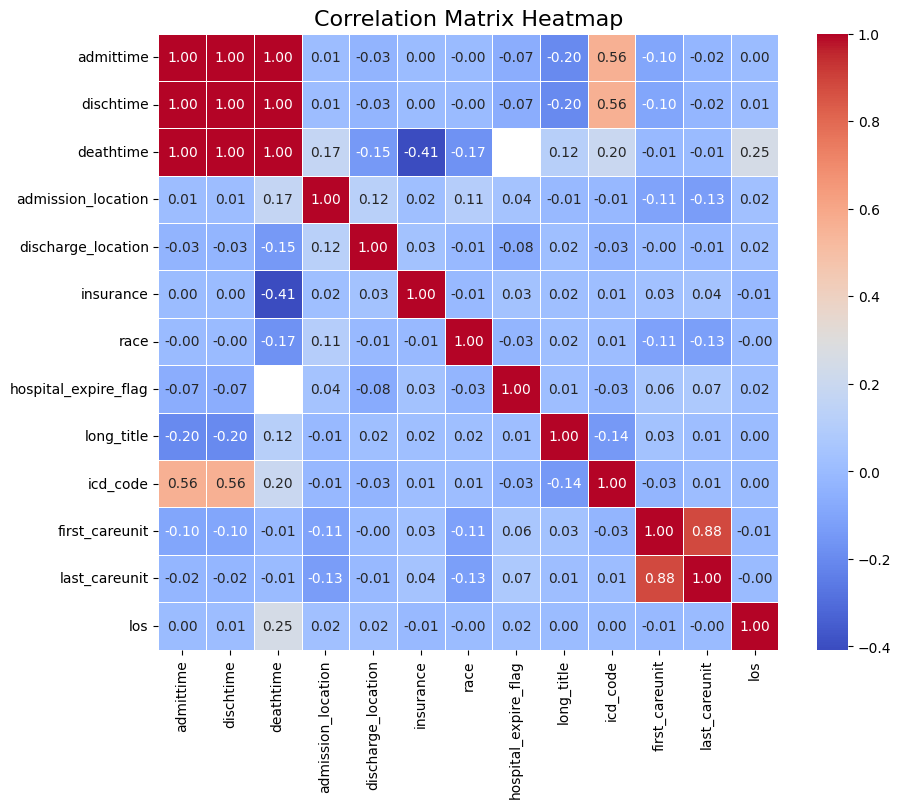

In [26]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title
plt.title('Correlation Matrix Heatmap', fontsize=16)

# Display the heatmap
plt.show()

#### To improve the accuracy of our model, we want to delete the highly correlated features from the dataframe.

In [27]:
# Set a threshold for removing highly correlated variables
threshold = 0.9

# Create a boolean mask for the upper triangle of the correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find index pairs of highly correlated variables
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

# Drop the highly correlated columns from the DataFrame
df_reduced = df.drop(columns=to_drop)

# Display the columns that were dropped
print(f"Dropped columns: {to_drop}")

Dropped columns: ['dischtime', 'deathtime']


In [28]:
df = df_reduced

In [29]:
df

,admittime,admission_location,discharge_location,insurance,race,hospital_expire_flag,long_title,icd_code,first_careunit,last_careunit,los
0,1497120600,4,12,46,9,0,1779,4517,21,19,1.921840
1,1585237440,4,27,46,3,1,1751,2879,24,22,10.909653
2,1595616540,4,8,33,9,1,505,3498,16,29,2.127523
3,1341440340,4,12,47,9,0,3018,1065,5,3,0.751146
4,1448333100,4,12,31,3,0,316,6398,30,28,12.125903
...,...,...,...,...,...,...,...,...,...,...,...
9996,1590386700,4,12,32,11,0,3608,8439,28,26,2.389387
9997,1572960420,11,12,33,9,0,1705,8248,11,9,0.646933
9998,1346716260,11,27,25,3,0,3018,1643,28,26,0.800197
9999,1403849880,4,11,0,9,0,3018,3864,10,8,0.801111


## Split Data into Features and Target

#### We are splitting the subset data into features and target.

In [30]:
X = df.drop('los', axis=1)
y = df['los']

### After removing highly correlated features, we want apply standard scaling to the remaining features.

In [31]:
#Scale the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
#Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [33]:
#Build and Train  Model
model = HistGradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

HistGradientBoostingRegressor(random_state=42)

## Feature Importance

We want to see which features are most important and which are not. If we find a feature is not much important in predicting the los, we will remove it.

As HistGradientBoostingRegressor does not have the feature_importances_ function in it, we will use permutation_importance function. This method works by shuffling each feature and measuring how much the model’s performance decreases.

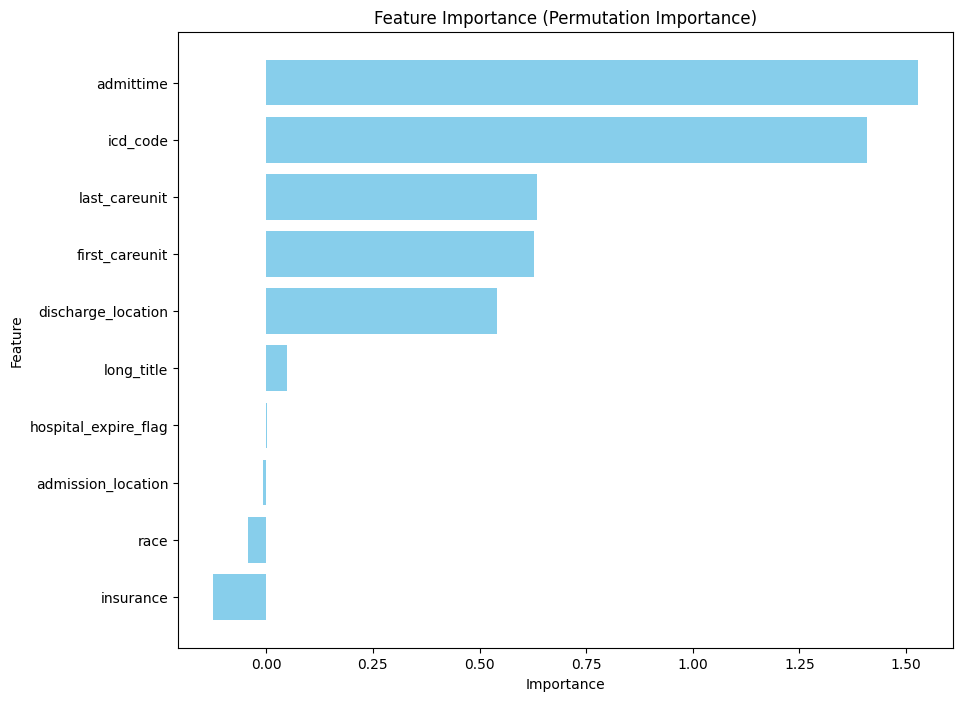

In [34]:
from sklearn.inspection import permutation_importance

# Perform permutation importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Get the importance scores
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Permutation Importance)')
plt.gca().invert_yaxis()  # Invert the y-axis to have the most important feature at the top
plt.show()


### We can remove less important features from the dataframe.

In [37]:
X = df.drop(['hospital_expire_flag', 'admission_location', 'race', 'insurance', 'los'], axis=1)
y = df['los']

In [38]:
#Scale the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
#Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [40]:
#Build and Train  Model
model = HistGradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

HistGradientBoostingRegressor(random_state=42)

In [41]:
# Evaluate the Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

In [42]:
mse

np.float64(90.62478365101869)

Further, we can look into Overfitting. It occurs when a model fits the training data too closely, capturing noise rather than patterns, leading to poor performance on new data. It can be caused by complex models, small datasets, or noisy data. 

To prevent it, we can simplify the model and apply cross-validation. For HistGradientBoostingRegressor, adjusting hyperparameters and using cross-validation are effective strategies.

In [43]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_iter': [100, 200, 300],
    'max_leaf_nodes': [20, 50, 100],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Initialize the model
model = HistGradientBoostingRegressor(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X, y)

# Print the best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {-grid_search.best_score_:.4f}")

# Get the best model
best_model = grid_search.best_estimator_

Best Parameters: {'learning_rate': 0.01, 'max_iter': 100, 'max_leaf_nodes': 100}
Best Score: 815.1591


### Now let's train the best model from Grid Search and see the score.

In [44]:
# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Train the best model on the entire training data (if not already done)
best_model.fit(X_train, y_train)

HistGradientBoostingRegressor(learning_rate=0.01, max_leaf_nodes=100,
                              random_state=42)

In [45]:
# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse:.4f}")

Mean Squared Error on Test Set: 42.5345
